# Лабораторная работа #3
Вариант #1

Искендеров А.С.


[Временная ссылка на загрузку таблицы](https://upload.disroot.org/r/wZnNGB1Q#++SndMesSUuH+eKUl4HiQtjhQKA3YexrvoWpm6jUIK8=)

[Ссылка на набор данных в Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [90]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\linode\appdata\local\programs\python\python311\lib\site-packages (1.26.4)




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, precision_score, recall_score, auc
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay

In [92]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Проверим таблицу на наличие незаполненных ячеек.

In [93]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Проверим соотношение мошеннических операций к обычным.

In [94]:
fraud_class = df["Class"].value_counts()
print(fraud_class)

Class
0    284315
1       492
Name: count, dtype: int64


Разделим данные на тренировочные и тестовые, попутно масштабируя столбцы `Time` и `Amount`.

In [95]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Применяем случайную недостаточную выборку на тестовых данных, чтобы уменьшить количество немошеннических операций.

In [96]:
# undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

Теперь мы можем натренировать модель логистической регрессии на полученной выборке.

In [97]:
lr_rus = LogisticRegression(random_state=42)
lr_rus.fit(X_rus, y_rus)

LogisticRegression(random_state=42)

Посмотрим статистики модели.

In [98]:
y_pred = lr_rus.predict(X_test)
print("Precision", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precision 0.03844510892780863
Recall: 0.9183673469387755
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



Посчитаем PR AUC (среднюю точность).

In [99]:
precision, recall, _ = precision_recall_curve(y_test, lr_rus.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print(f"PR AUC:", pr_auc)

PR AUC: 0.7172013391439399


Теперь попробуем натренировать модель на перенасыщенных данных. Для 
получения выборки данных будем использовать SMOTE.

In [100]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(X_smote, y_smote)

LogisticRegression(random_state=42)

Посмотрим статистику.

In [101]:
y_pred = lr_smote.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

precision, recall, _ = precision_recall_curve(y_test, lr_smote.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print("PR AUC:", pr_auc)

print(classification_report(y_test, y_pred))

Precision: 0.05813953488372093
Recall: 0.9183673469387755
PR AUC: 0.7703412904668423
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



Модель с перенасыщенной выборкой (SMOTE oversampling) показывает лучшие 
результаты, чем модель с недостаточной (random undersampling). Это связано
с тем, что при перенасыщении данные не теряются.

Попробуем натренировать модель, учитывающую несбалансированность данных
(Balanced Random Forest Classifier).

In [102]:
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"Precision: {prec}\nRecall: {rec}")

precision, recall, _ = precision_recall_curve(y_test, brf.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)
print("PR AUC:", pr_auc)

Precision: 0.12464183381088825
Recall: 0.8877551020408163
PR AUC: 0.7963616509078305


У данной модели точность выше, чем у двух предыдущих, потому что она 
используется конкретно в таких случаях с несбалансированными данными.

Изобразим точности моделей на графиках.

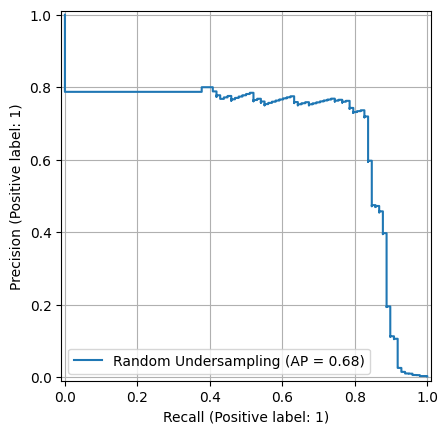

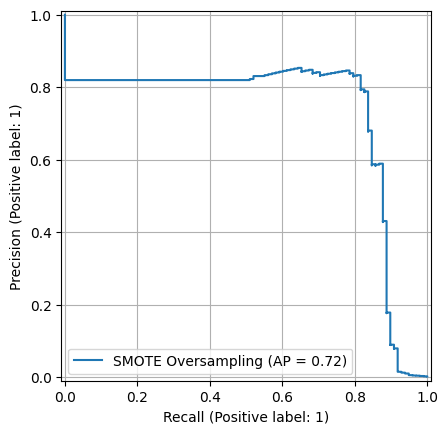

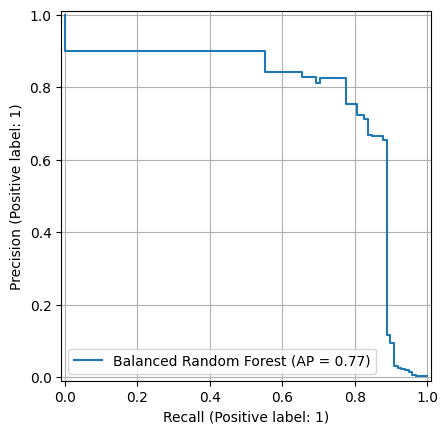

In [103]:
PrecisionRecallDisplay.from_estimator(lr_rus, X_test, y_test, name="Random Undersampling")
plt.grid()
PrecisionRecallDisplay.from_estimator(lr_smote, X_test, y_test, name="SMOTE Oversampling")
plt.grid()
PrecisionRecallDisplay.from_estimator(brf, X_test, y_test, name="Balanced Random Forest")
plt.grid()